# Hány éves a kapitány ?

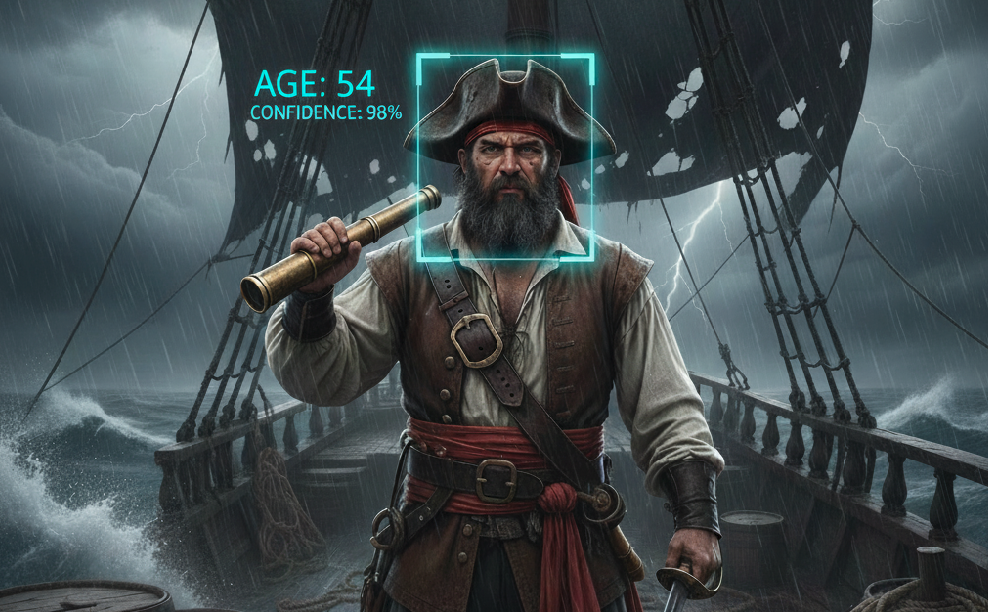


Matekórán hallottunk már hasonlót:

"Ha a csatolt zip-ben 138 kép van és a képek átlagosan 71 kB tárhelyet foglalnak, akkor hány éves a kapitány?"

Feladatod: keresd meg, hogy melyik képen a legvalószínűbb, hogy egy kapitány van, és állapítsd meg az ő korát! A választ egész számként add meg!

Adott:

*   captains.zip: arcképeket tartalmazó mappa
*   modell: "openai/clip-vit-base-patch32" -  https://huggingface.co/openai/clip-vit-base-patch32
*   bináris osztályzáshoz labelek:["a photo of a captain", "a photo of an average person"]
*   arcképből kort prediktáló háló - https://pypi.org/project/deepface/ - Facial Attribute Analysis

A feladat CPU-n is megoldható,de GPU-n valamivel gyorsabb!

**A környezet CPU-ra van állítva**

In [ ]:
# Ha bármiért elakadna a letöltés, használd a feladathoz csatolt zipet!
!gdown 10bVpiKakCTJUHMdBHzNohpUxosWahZVY

In [ ]:
!unzip -q -n captains.zip

In [ ]:
!pip install -U transformers deepface==0.0.95

In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import os
import torch
from tqdm import tqdm
import pandas as pd
from IPython.display import display

In [ ]:
# init model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
# set device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print(device)

cpu


In [ ]:
# load images
img_folder = '/home/tamas/work/competition/hackaton/OITM2025/Mesterséges Intelligencia/2/captains/'
img_list = os.listdir(img_folder)
img_paths = [img_folder + imgfile for imgfile in img_list]

images = [Image.open(p) for p in img_paths]

In [ ]:
# check mean file size, just for fun
file_sizes = [os.path.getsize(path) / 1024 for path in img_paths]
mean = sum(file_sizes) / len(file_sizes)
print(f'Mean file size is: {mean:.1f} kB')


# Finding the Captain

Check https://huggingface.co/openai/clip-vit-base-patch32

In [ ]:
# labels for CLIP
labels = ["a photo of a captain", "a photo of an average person"]

In [ ]:
# find the captian image using CLIP
captain_scores = []

for image in tqdm(images):
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True).to(device)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)
    
    # Get the probability for "captain" (index 0)
    captain_score = probs[0][0].item()
    captain_scores.append(captain_score)

# Find the image with highest captain score
max_idx = captain_scores.index(max(captain_scores))
captain_image_path = img_paths[max_idx]
captain_image = images[max_idx]

print(f"Captain found in: {img_list[max_idx]}")
print(f"Captain probability: {captain_scores[max_idx]:.4f}")

# Display the captain image
display(captain_image)

# Predict captain's age

Check https://pypi.org/project/deepface/ Facial Attribute Analysis


In [ ]:
from deepface import DeepFace

In [ ]:
# Predict age of the captain
result = DeepFace.analyze(img_path=captain_image_path, actions=['age'], enforce_detection=False)

# Extract age
captain_age = round(result[0]['age'])

print(f"\nThe captain's age is: {captain_age} years old")
print(f"\nAnswer: {captain_age}")